In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('churn (1).csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.drop(['RowNumber'],axis=1,inplace=True)

In [7]:
df.shape

(10000, 13)

In [9]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [16]:
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
df.shape

(10000, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   Surname            10000 non-null  object 
 2   CreditScore        10000 non-null  int64  
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(8), object(1), uint8(3)
memory usage: 888.8+ KB


In [19]:
df.drop(columns = ['CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
df.shape

(10000, 12)

In [21]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 4s 9ms/step - loss: 0.6232 - accuracy: 0.6598 - val_loss: 0.5257 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.7958 - val_loss: 0.5035 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.7958 - val_loss: 0.4998 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.7958 - val_loss: 0.4979 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.7958 - val_loss: 0.4966 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5009 - accuracy: 0.7958 - val_loss: 0.4958 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7958 - val_loss: 0.4959 - val_accuracy: 0.7969

Epoch 58/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.7958 - val_loss: 0.4944 - val_accuracy: 0.7969
Epoch 59/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.7958 - val_loss: 0.4943 - val_accuracy: 0.7969
Epoch 60/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.7958 - val_loss: 0.4944 - val_accuracy: 0.7969
Epoch 61/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7958 - val_loss: 0.4945 - val_accuracy: 0.7969
Epoch 62/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.7958 - val_loss: 0.4947 - val_accuracy: 0.7969
Epoch 63/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.7958 - val_loss: 0.4944 - val_accuracy: 0.7969
Epoch 64/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.7958 - val_loss: 0.4946 - val_accuracy:

In [28]:
y_pred = model.predict(X_test)

63/63 [==============================] - 1s 6ms/step


In [29]:
y_pred

array([[0.24506749],
       [0.24506749],
       [0.23910414],
       ...,
       [0.24506749],
       [0.24703765],
       [0.24506749]], dtype=float32)

In [30]:
y_pred = y_pred.argmax(axis=-1)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

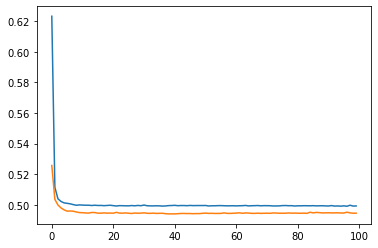

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

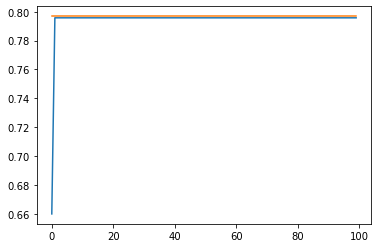

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])